In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
words = open("names.txt").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [4]:
block_size = 3
X, Y = [], []
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [5]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

Embedding:\
Vocabulary is embended into a vector of size \( emb_size \).

In [6]:
emb_size = 27
C = torch.randn((vocab_size, emb_size))
C

tensor([[-5.6428e-01, -1.3510e+00,  7.2007e-01, -1.1224e+00,  6.7149e-01,
         -7.4050e-01,  6.5266e-01,  2.4041e-01, -6.0599e-01, -7.1440e-01,
         -4.1658e-01,  2.2583e-02,  1.1887e+00, -1.7194e+00,  1.1316e+00,
         -6.0870e-01, -7.8796e-01, -3.3670e-01, -1.5229e-01,  1.2497e+00,
         -1.9535e+00,  7.7595e-02,  6.1936e-02, -1.1782e+00,  1.4679e-01,
         -1.8195e+00,  8.4060e-01],
        [ 2.8928e-01,  1.6269e+00, -9.8380e-01, -4.4976e-01, -8.5733e-02,
         -7.2354e-01, -1.6443e+00, -4.9037e-01, -5.7858e-01, -1.1739e+00,
          9.5815e-02,  2.5268e-01,  4.0167e-01, -2.1163e+00,  2.8745e-01,
         -5.5407e-01,  1.3538e-02, -1.4720e+00, -1.0788e-01,  2.1445e+00,
          1.5039e+00, -6.2426e-01,  7.8423e-01,  2.9004e-02, -9.0344e-02,
          2.2058e-02, -3.8709e-01],
        [-8.2221e-01,  7.9807e-01, -2.0569e+00,  5.4715e-01,  6.9596e-01,
          6.7397e-01,  9.5173e-01, -1.5691e+00, -6.1055e-01, -9.3841e-01,
         -4.5433e-01,  1.4223e+00, -8.19

In [7]:
C[0]

tensor([-0.5643, -1.3510,  0.7201, -1.1224,  0.6715, -0.7405,  0.6527,  0.2404,
        -0.6060, -0.7144, -0.4166,  0.0226,  1.1887, -1.7194,  1.1316, -0.6087,
        -0.7880, -0.3367, -0.1523,  1.2497, -1.9535,  0.0776,  0.0619, -1.1782,
         0.1468, -1.8195,  0.8406])

In [8]:
F.one_hot(X[0], num_classes=vocab_size).float() @ C

tensor([[-0.5643, -1.3510,  0.7201, -1.1224,  0.6715, -0.7405,  0.6527,  0.2404,
         -0.6060, -0.7144, -0.4166,  0.0226,  1.1887, -1.7194,  1.1316, -0.6087,
         -0.7880, -0.3367, -0.1523,  1.2497, -1.9535,  0.0776,  0.0619, -1.1782,
          0.1468, -1.8195,  0.8406],
        [-0.5643, -1.3510,  0.7201, -1.1224,  0.6715, -0.7405,  0.6527,  0.2404,
         -0.6060, -0.7144, -0.4166,  0.0226,  1.1887, -1.7194,  1.1316, -0.6087,
         -0.7880, -0.3367, -0.1523,  1.2497, -1.9535,  0.0776,  0.0619, -1.1782,
          0.1468, -1.8195,  0.8406],
        [-0.5643, -1.3510,  0.7201, -1.1224,  0.6715, -0.7405,  0.6527,  0.2404,
         -0.6060, -0.7144, -0.4166,  0.0226,  1.1887, -1.7194,  1.1316, -0.6087,
         -0.7880, -0.3367, -0.1523,  1.2497, -1.9535,  0.0776,  0.0619, -1.1782,
          0.1468, -1.8195,  0.8406]])

In [9]:
C[X[0]]

tensor([[-0.5643, -1.3510,  0.7201, -1.1224,  0.6715, -0.7405,  0.6527,  0.2404,
         -0.6060, -0.7144, -0.4166,  0.0226,  1.1887, -1.7194,  1.1316, -0.6087,
         -0.7880, -0.3367, -0.1523,  1.2497, -1.9535,  0.0776,  0.0619, -1.1782,
          0.1468, -1.8195,  0.8406],
        [-0.5643, -1.3510,  0.7201, -1.1224,  0.6715, -0.7405,  0.6527,  0.2404,
         -0.6060, -0.7144, -0.4166,  0.0226,  1.1887, -1.7194,  1.1316, -0.6087,
         -0.7880, -0.3367, -0.1523,  1.2497, -1.9535,  0.0776,  0.0619, -1.1782,
          0.1468, -1.8195,  0.8406],
        [-0.5643, -1.3510,  0.7201, -1.1224,  0.6715, -0.7405,  0.6527,  0.2404,
         -0.6060, -0.7144, -0.4166,  0.0226,  1.1887, -1.7194,  1.1316, -0.6087,
         -0.7880, -0.3367, -0.1523,  1.2497, -1.9535,  0.0776,  0.0619, -1.1782,
          0.1468, -1.8195,  0.8406]])

In [10]:
emb1 = F.one_hot(X, num_classes=vocab_size).float() @ C
emb1

tensor([[[-0.5643, -1.3510,  0.7201,  ...,  0.1468, -1.8195,  0.8406],
         [-0.5643, -1.3510,  0.7201,  ...,  0.1468, -1.8195,  0.8406],
         [-0.5643, -1.3510,  0.7201,  ...,  0.1468, -1.8195,  0.8406]],

        [[-0.5643, -1.3510,  0.7201,  ...,  0.1468, -1.8195,  0.8406],
         [-0.5643, -1.3510,  0.7201,  ...,  0.1468, -1.8195,  0.8406],
         [ 0.5511, -0.1321,  0.2801,  ...,  0.3676,  0.1808,  0.0404]],

        [[-0.5643, -1.3510,  0.7201,  ...,  0.1468, -1.8195,  0.8406],
         [ 0.5511, -0.1321,  0.2801,  ...,  0.3676,  0.1808,  0.0404],
         [-1.2426,  0.6644, -1.0472,  ...,  0.2890, -0.9391, -0.7268]],

        ...,

        [[-1.4288, -1.3525,  0.0893,  ...,  0.6126,  0.8362, -0.2110],
         [-1.4288, -1.3525,  0.0893,  ...,  0.6126,  0.8362, -0.2110],
         [-1.6860,  0.9684, -0.2413,  ..., -1.1407,  1.4081, -0.1576]],

        [[-1.4288, -1.3525,  0.0893,  ...,  0.6126,  0.8362, -0.2110],
         [-1.6860,  0.9684, -0.2413,  ..., -1.1407,  1.

In [11]:
emb = C[X]


In [12]:
W1 = torch.randn((block_size*emb_size, 100))
b1 = torch.randn(100)

We want something like\
emb @ W1  + b1
So we have emb, which is of shape (n, block_size, 2)\
and we can concatenate each (block_size, 2) vector in to a ($block\_size*2$) vector\
Making it of shape (n, block_size*2)\
``` python
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]] ,1)
```

``` python
torch.cat(torch.unbind(emb, 1), 1) 
```

``` python
torch.cat([emb[:, i, :] for i in range(block_size)], 1)
```

In [13]:
h = torch.tanh(emb.view([-1, block_size*emb_size]) @ W1 + b1)
h

tensor([[-1.0000,  0.9843,  0.9574,  ..., -1.0000, -0.3672, -0.9994],
        [-1.0000,  1.0000,  0.9815,  ..., -1.0000, -1.0000, -1.0000],
        [-0.6127,  0.9572,  0.9861,  ..., -1.0000, -0.9991, -0.9996],
        ...,
        [ 0.9954, -1.0000,  1.0000,  ..., -1.0000, -1.0000,  0.6687],
        [ 0.9860, -0.9515,  1.0000,  ...,  0.7839, -0.9998,  1.0000],
        [-1.0000, -1.0000,  1.0000,  ..., -1.0000, -1.0000, -1.0000]])

In [14]:
h.shape

torch.Size([228146, 100])

In [15]:
W2 = torch.randn((100, vocab_size))
b2 = torch.randn(vocab_size)

In [16]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

Splitting the data into training, validation, and test sets:

In [17]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y


random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

Forward pass:

In [20]:
n_hidden = 200
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, emb_size))

W1 = torch.randn((block_size*emb_size, n_hidden), generator=g) * 0.01
b1 = torch.randn(n_hidden, generator=g) * 0.01

W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0.01

parameters = [C, W1, b1, W2, b2]
print("Parameters:",sum(p.nelement() for p in parameters))

for p in parameters:
    p.requires_grad = True

Parameters: 22556


Backward pass:

### Batches
We wiil choose random batches of size 32

In [21]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre


In [22]:
lri = []
lossi = []
stepi = []
batch_size = 50


In [33]:

for i in range(500000):
    #minibatch
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view([-1, block_size*emb_size]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # if i % 100 == 0:
        # print(f'{loss.item():.4f}')
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    lr = 0.005 if i < 100000 else 0.001
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lr)
    stepi.append(i)
    lossi.append(loss.log10().item())

In [36]:
emb = C[Xtr]
h = torch.tanh(emb.view([-1, block_size*emb_size]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(f'{loss.item():.4f}')
loss

2.0197


tensor(2.0197, grad_fn=<NllLossBackward0>)

In [35]:
emb = C[Xdev]
h = torch.tanh(emb.view([-1, block_size*emb_size]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(f'{loss.item():.4f}')
loss


2.0833


tensor(2.0833, grad_fn=<NllLossBackward0>)

The loss on training data is roughly the same as on validation data. => the model is underfitting\
If the loss on validation data is much higher than on training data, the model is overfitting.

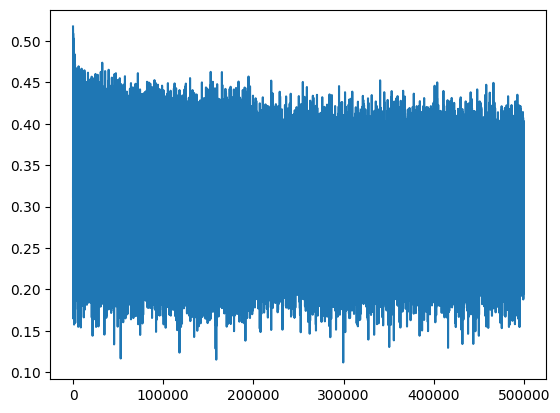

In [34]:
plt.plot(stepi, lossi)

| Training split        | 80% | optimizing model parameters |
|-----------------------|-----|-------------|
| Dev/Validation split  | 10% | optimizing hyper parameters |
| Testing split         | 10% |  Performance of the model|

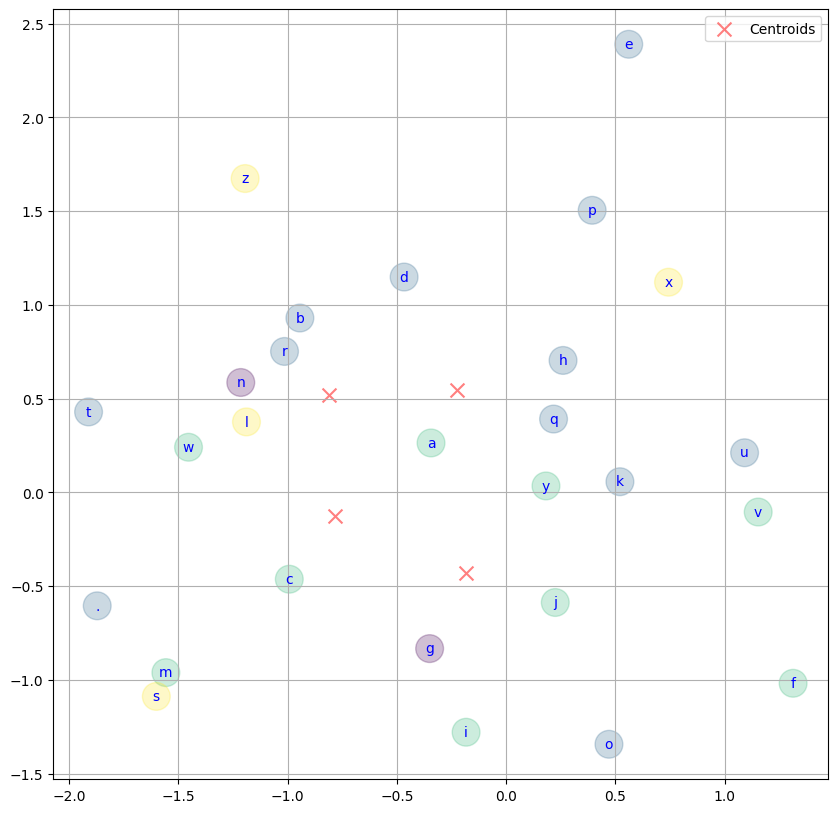

In [37]:
from sklearn.cluster import KMeans

# Your data
X = C.data

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 10))
n, m = 0, 1
#Plotting the points with colors for each cluster
plt.scatter(X[:, n], X[:, m], c=labels, cmap='viridis', s=400, alpha=0.25)
plt.scatter(centroids[:, n], centroids[:, m], c='red', marker='x', s=100, label='Centroids', alpha=0.5)
for i in range(C.shape[0]):
    plt.text(C[i,n].item(), C[i,m].item(), itos[i], ha="center", va="center", color='blue')
plt.grid('minor')
plt.legend()
plt.show()


In [38]:
#sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

montaymyah.
see.
med.
ryla.
reisha.
ejgraegan.
ched.
elin.
shi.
jenne.
elisson.
arleiyah.
honelin.
shubrighadriel.
kindretlynn.
novana.
ube.
geder.
yarue.
elsy.
